In [1]:
import matplotlib as plt
import scanpy as sc
import pandas as pd
import numpy as np
import os

In [2]:
adata = sc.read_h5ad("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:22/all_data_combined_post_scrublet.h5ad")

In [4]:
import numpy as np
import pandas as pd

# Ensure all NaNs are removed before converting to a list
celltype_list = adata.obs['all_celltype'].dropna().unique()

# Replace 'FAT_1' with 'FAT-1'
celltype_list = [cell.replace('FAT_1', 'FAT-1') for cell in celltype_list]
celltype_list = [cell.replace('FAT_2', 'FAT-2') for cell in celltype_list]
celltype_list = [cell.replace('CONE_1', 'CONE-1') for cell in celltype_list]
celltype_list = [cell.replace('CONE_2', 'CONE-2') for cell in celltype_list]
celltype_list = [cell.replace('LC22_LPLC4', 'LC22-LPLC4') for cell in celltype_list]

# Convert to a Python list and explicitly remove any 'nan' strings
celltype_list = [str(ct) for ct in celltype_list if pd.notna(ct) and str(ct).lower() != "nan"]

# Print to check if 'nan' is still present
print(celltype_list)  # Ensure "nan" is not in the list

['Unannotated', 'Tm5a', 'R1-6', 'R7', 'Lai', 'TmY3', 'CONE-1', 'EPI', 'FAT-1', 'T4T5', 'OCHG', 'TmY4', 'LC12', 'JON', 'T1', 'AL-PN', 'L3', 'T4T5ab', 'LC17', 'LPLC2', 'Tm9', 'LC4', 'ALG', 'TmY14', 'CONE-2', 'PGM', 'LC10a', 'Tm1', 'L2', 'CG', 'EB-RN', 'Mi1', 'KCab', 'KCapbp', 'Mi15', 'HE', 'Mi4', 'MUS', 'Mi9', 'T2', 'FAT-2', 'T2a', 'SPG', 'Tm2', 'DRA', 'T4T5cd', 'CLKN', 'R8', 'Dm9', 'Dm10', 'DAN', 'KCy', 'LAWF1', 'L5', 'T3', 'PAM-DAN', 'PNG', 'LC10b', 'L1', 'L4', 'EG', 'ORN', 'PB', 'Dm3', 'LLPC1', 'Dm8', 'LPC1', 'CHG', 'LC14', 'TmY8', 'Tm4', 'LAWF2', 'dFB', 'Dm2', 'C3', 'LC16', 'LPLC1', 'C2', 'LEMG', 'LC21', 'Dm12', 'TmY5a', 'OCR', 'Pm4', 'Tm20', 'AudSN', 'LC22-LPLC4', 'LC11', 'SERN', 'LC10d', 'Pm3', 'Dm4', 'LC18', 'Dm11', 'LC6', 'Dm1', 'LC20', 'OAN', 'Pm2', 'Pm1', 'TYRN', 'Tm5c', 'LC13', 'DCN', 'Tm29']


In [3]:
adata = adata[adata.obs['batch'] != '20230925'].copy()

In [ ]:
import os
import pandas as pd

# Ensure we are in the correct directory
all_files = set(os.listdir())  # Get all filenames in the directory

# Extract and clean cell type names
celltype_list = adata.obs['all_celltype'].dropna().unique()
celltype_list = [str(ct) for ct in celltype_list if pd.notna(ct) and str(ct).lower() != "nan"]

# Standardize cell type names: replace underscores with hyphens
celltype_list = [ct.replace('_', '-') for ct in celltype_list]

# Function to find the actual filename in the directory
def find_matching_filename(prefix, celltype):
    possible_names = [
        f"{prefix}_{celltype}.csv",       # Hyphen version
        f"{prefix}_{celltype.replace('-', '_')}.csv",  # Underscore version
    ]
    for name in possible_names:
        if name in all_files:
            return name  # Return the correct filename
    print(f"⚠️ Warning: No file found for {celltype} in {prefix}")
    return None  # If no match is found

# Load data safely
def load_existing_csv(prefix, celltype_list):
    data = {}
    for celltype in celltype_list + ["Unannotated"]:  # Ensure "Unannotated" is included
        filename = find_matching_filename(prefix, celltype)  
        if filename:
            try:
                data[celltype] = pd.read_csv(filename)
                print(f"✅ Loaded: {filename}")
            except Exception as e:
                print(f"❌ Error loading {filename}: {e}")
        else:
            print(f"⚠️ Skipping: {celltype} (file not found)")
    return data

# Load datasets
WTLD_data = load_existing_csv("WTLD", celltype_list)
WTDD_data = load_existing_csv("WTDD", celltype_list)
MTLD_data = load_existing_csv("MTLD", celltype_list)
MTDD_data = load_existing_csv("MTDD", celltype_list)


In [61]:
import pandas as pd

# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in WTLD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("WTLD_combined.csv", index=False)
print("✅ WTLD_combined.csv saved successfully!")

# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in WTDD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("WTDD_combined.csv", index=False)
print("✅ WTDD_combined.csv saved successfully!")

# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in MTLD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("MTLD_combined.csv", index=False)
print("✅ MTLD_combined.csv saved successfully!")

# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in MTDD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("MTDD_combined.csv", index=False)
print("✅ MTDD_combined.csv saved successfully!")

✅ WTLD_combined.csv saved successfully!
✅ WTDD_combined.csv saved successfully!
✅ MTLD_combined.csv saved successfully!
✅ MTDD_combined.csv saved successfully!


In [4]:
WTLD = pd.read_csv("WTLD_combined.csv")
WTDD = pd.read_csv("WTDD_combined.csv")
MTLD = pd.read_csv("MTLD_combined.csv")
MTDD = pd.read_csv("MTDD_combined.csv")

import pandas as pd

# Tag each DataFrame with a 'dataset' column
WTLD["dataset"] = "WTLD"
WTDD["dataset"] = "WTDD"
MTLD["dataset"] = "MTLD"
MTDD["dataset"] = "MTDD"

# Concatenate them all into one
df_combined = pd.concat([WTLD, WTDD, MTLD, MTDD], ignore_index=True)

def dataset_offset(ds):
    return {"WTLD": 0, "WTDD": 24, "MTLD": 48, "MTDD": 72}[ds]

df_combined["time"] = df_combined["avg_phase"] + df_combined["dataset"].apply(dataset_offset)


/tmp/ipykernel_27959/3084376492.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


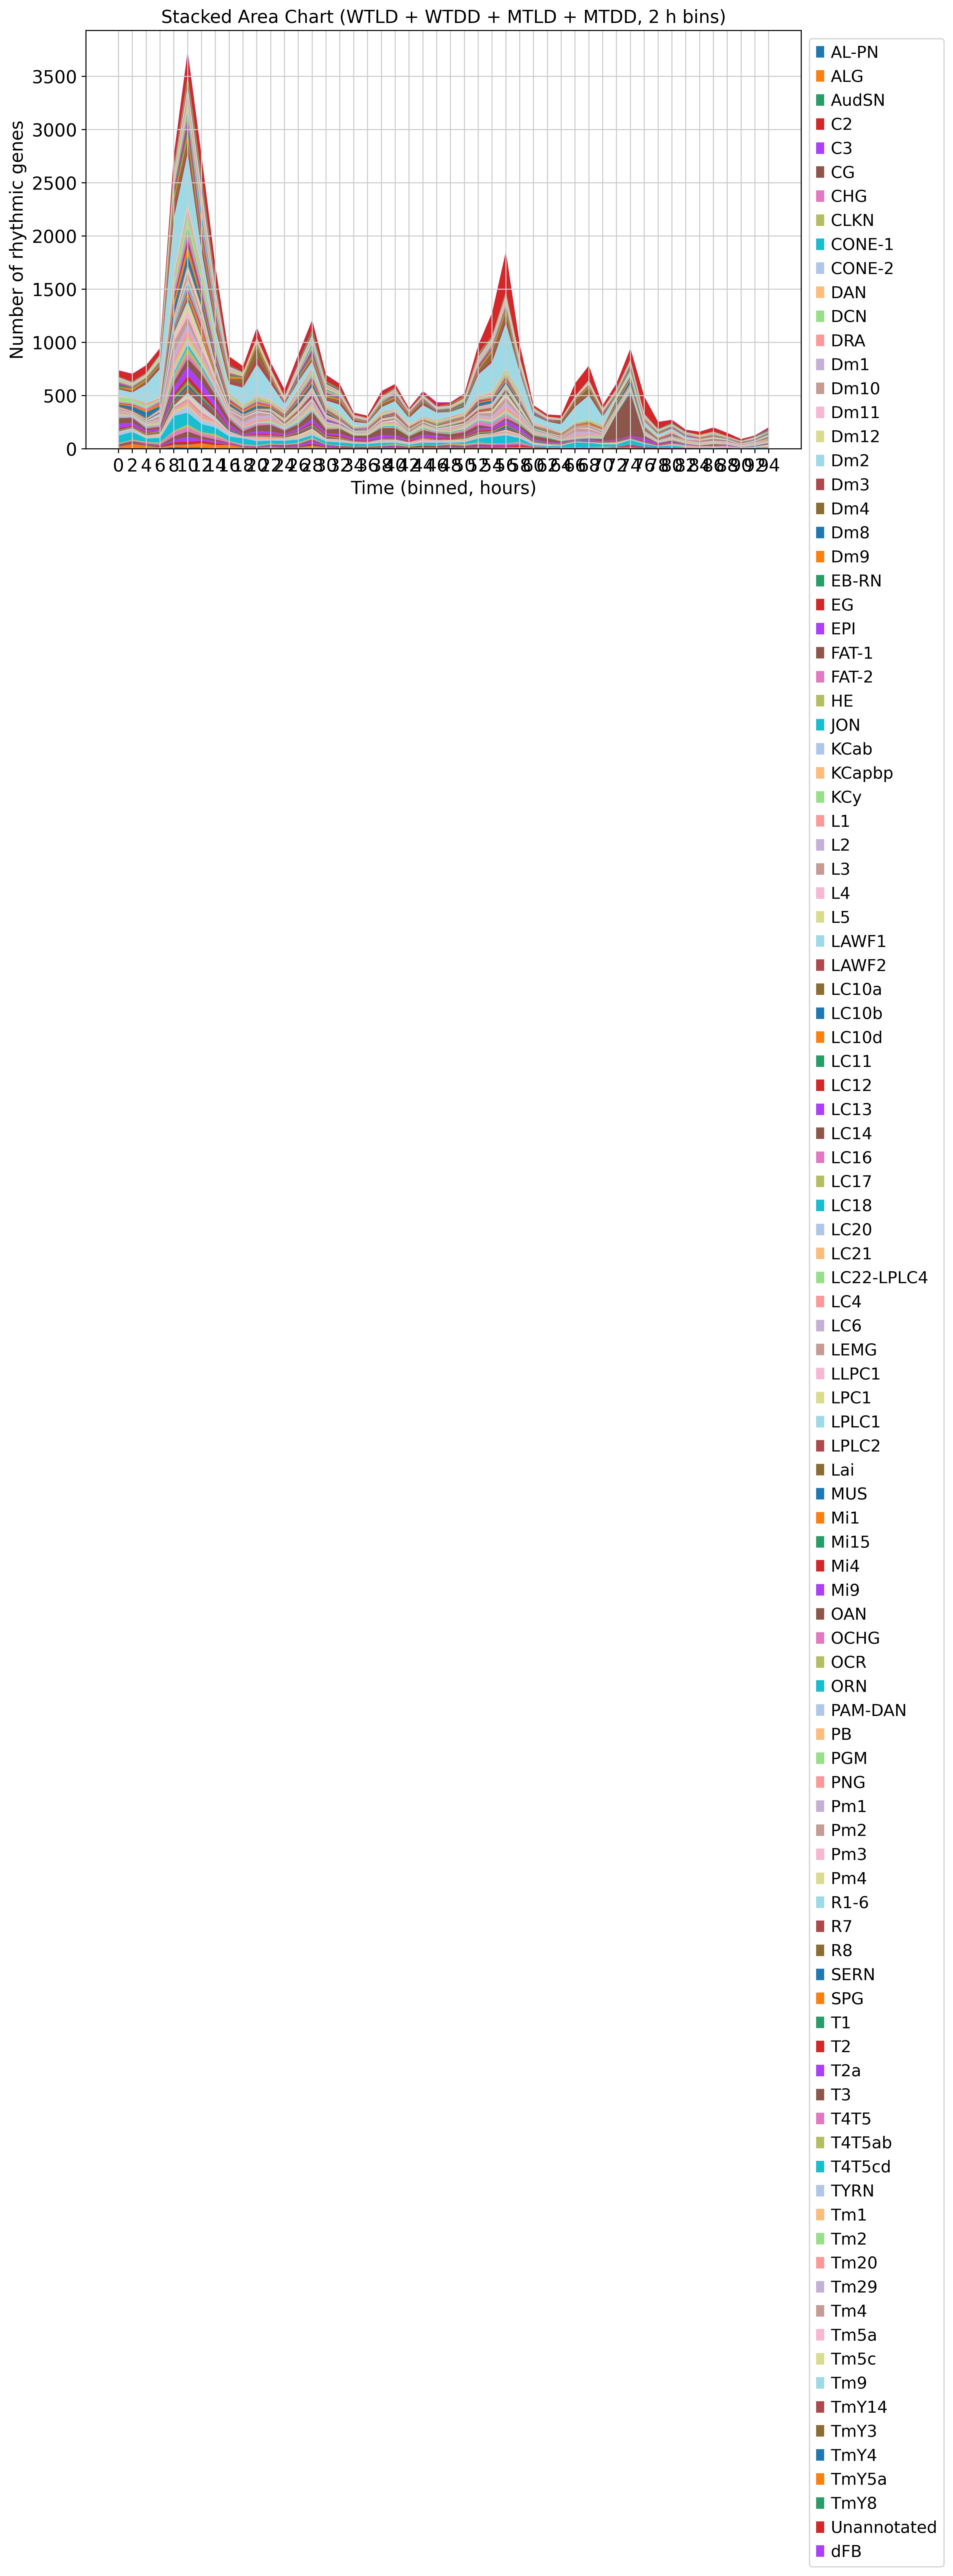

In [28]:
# filter significant
df_sig = df_combined[df_combined["avg_p"] < 0.05].copy()

# 2 h bins on the concatenated time
df_sig["time_bin"] = (df_sig["time"] // 2) * 2
#df_sig["time_bin"] = df_sig["time"].astype(int)

# count per bin & cell type
counts = (
    df_sig
    .groupby(["time_bin", "cell_type"])["CycID"]
    .count()
    .reset_index(name="n")
)

# pivot so each cell_type is a column
counts_pivot = counts.pivot(
    index="time_bin",
    columns="cell_type",
    values="n"
).fillna(0)

# plotting
import matplotlib.pyplot as plt
import numpy as np

x = counts_pivot.index
y = counts_pivot.values.T

plt.figure(figsize=(10, 6))
plt.stackplot(x, *y, labels=counts_pivot.columns)
plt.xlabel("Time (binned, hours)")
plt.ylabel("Number of rhythmic genes")
plt.title("Stacked Area Chart (WTLD + WTDD + MTLD + MTDD, 2 h bins)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(np.arange(x.min(), x.max()+1, 2))   # ticks every 2 h
plt.tight_layout()
plt.show()


In [13]:
sc.set_figure_params(dpi = 200)

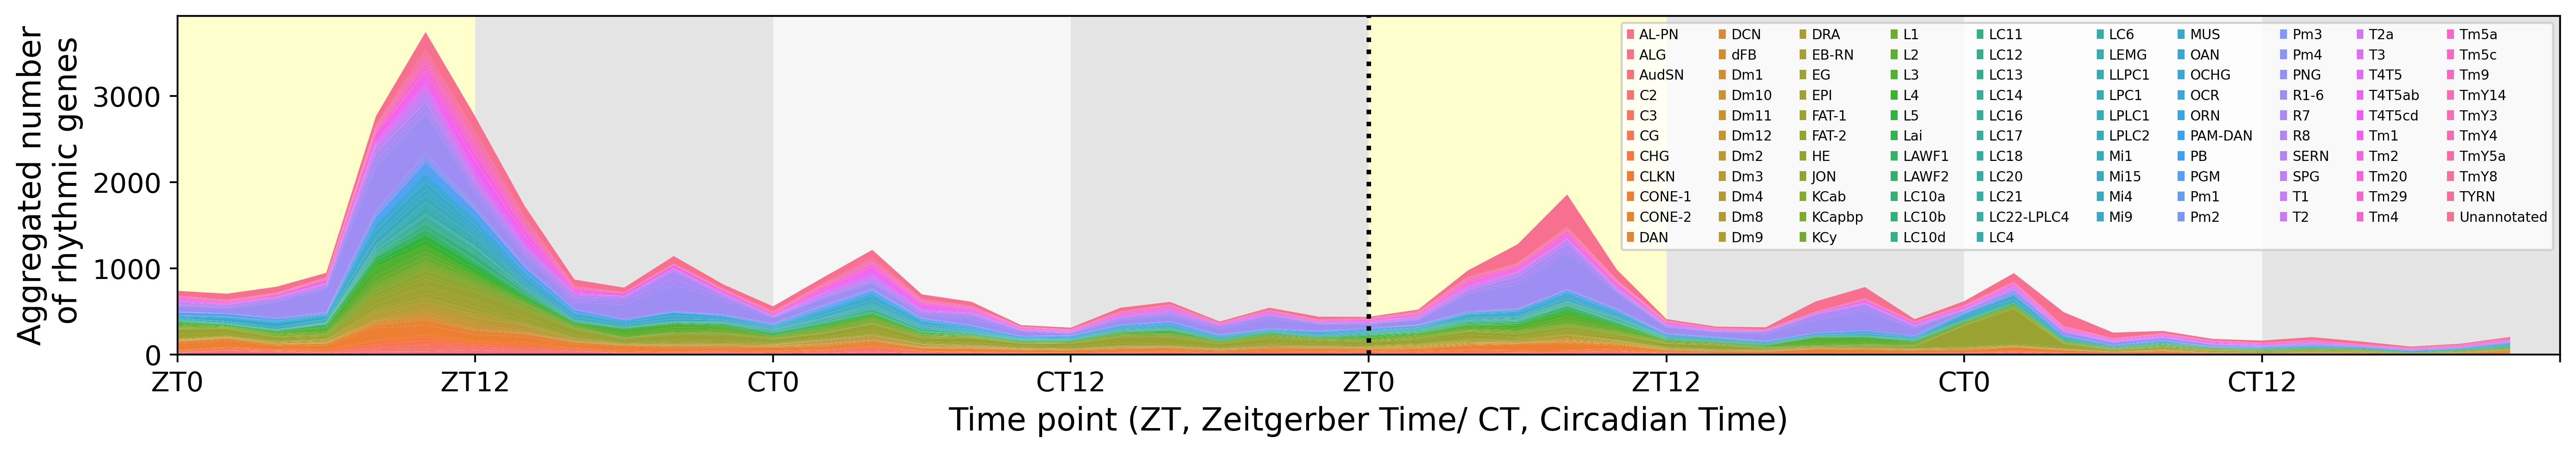

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort columns alphabetically ignoring case
sorted_columns = sorted(counts_pivot.columns, key=lambda x: x.lower())
counts_pivot = counts_pivot[sorted_columns]

# Then continue with your plotting code as-is
num_cell_types = len(counts_pivot.columns)
colors = sns.color_palette("husl", n_colors=num_cell_types)

plt.figure(figsize=(16, 3))

# Background rectangles
plt.axvspan(0, 12, facecolor="yellow", alpha=0.2)
plt.axvspan(48, 60, facecolor="yellow", alpha=0.2)
plt.axvspan(24, 36, facecolor="lightgray", alpha=0.2)
plt.axvspan(72, 84, facecolor="lightgray", alpha=0.2)
plt.axvspan(12, 24, facecolor="gray", alpha=0.2)
plt.axvspan(36, 48, facecolor="gray", alpha=0.2)
plt.axvspan(60, 72, facecolor="gray", alpha=0.2)
plt.axvspan(84, 96, facecolor="gray", alpha=0.2)
plt.axvline(x=48, color="black", linestyle=":", linewidth=2)

# Stacked area
x = counts_pivot.index
y = counts_pivot.values.T
plt.stackplot(x, *y, labels=counts_pivot.columns, colors=colors)

plt.xlabel("Time point (ZT, Zeitgerber Time/ CT, Circadian Time)")
plt.ylabel("Aggregated number\n of rhythmic genes")
plt.yticks(fontsize = 12)
# Manually set x-axis ticks & labels
tick_positions = [0, 12, 24, 36, 48, 60, 72, 84, 96]
tick_labels    = ["ZT0", "ZT12", "CT0", "CT12", "ZT0", "ZT12", "CT0", "CT12", ""]
plt.xticks(tick_positions, tick_labels, fontsize = 12)

# Legend
plt.legend(loc="upper right", bbox_to_anchor=(1, 1), ncol=10, fontsize=6)

plt.grid(False)
plt.xlim(0, 96)
plt.tight_layout()
plt.show()


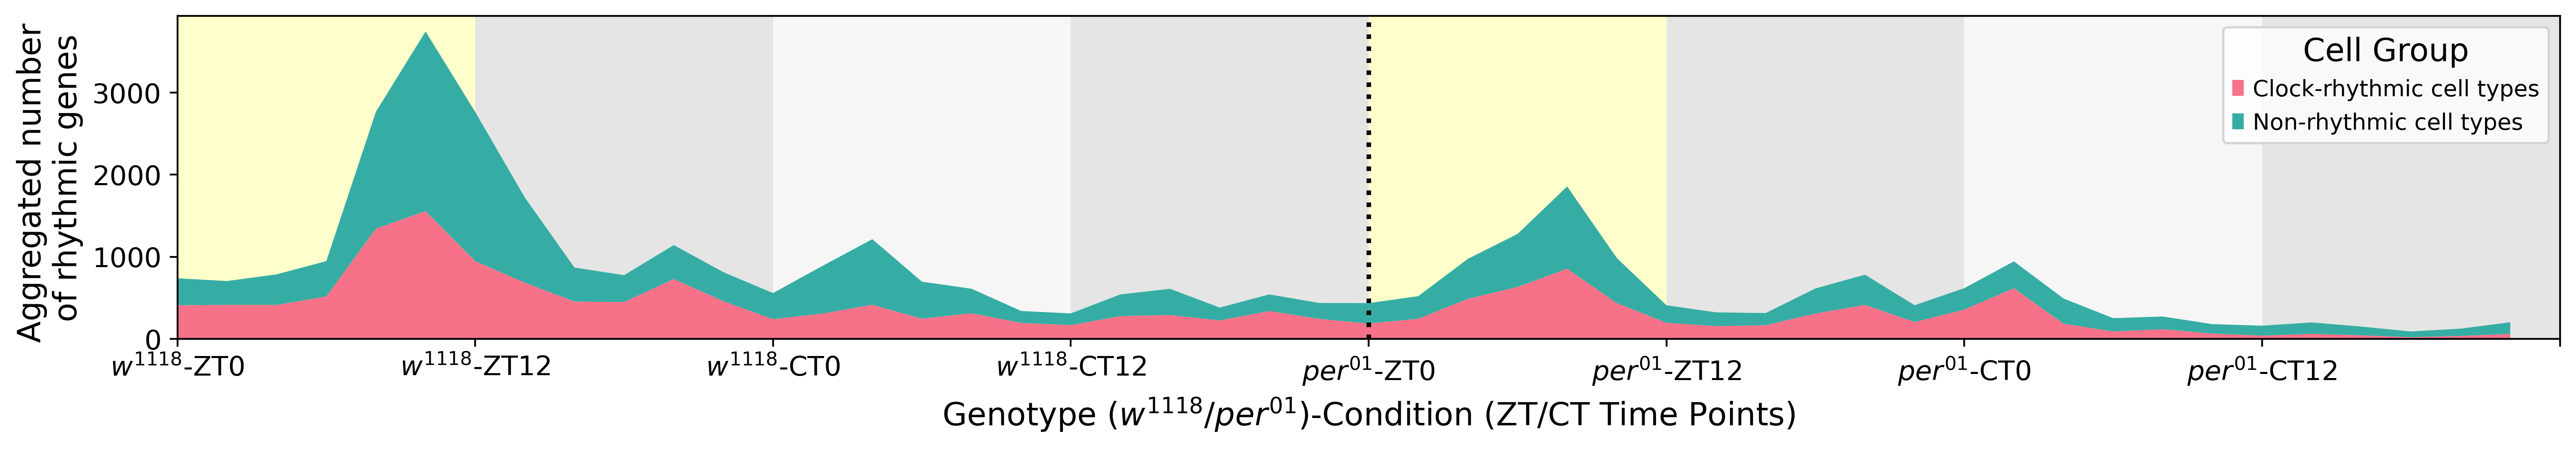

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define rhythmic cell types (Group 1)
rhythmic_cell_types = [
    "FAT-1", "FAT-2", "HE", "ALG", "CHG", "PNG", "SPG", 
    "CG", "EG", "LEMG", "CONE-1", "CONE-2", "R1-6", "R7", "R8", "CLKN", "KCy", 
    "PGM", "DRA", "OCR", "T1", "EPI"
]

# Define non-rhythmic cell types (Group 2)
non_rhythmic_cell_types = [col for col in counts_pivot.columns if col not in rhythmic_cell_types]

# Grouped DataFrame
counts_grouped = pd.DataFrame({
    "Clock-rhythmic cell types": counts_pivot[rhythmic_cell_types].sum(axis=1),
    "Non-rhythmic cell types": counts_pivot[non_rhythmic_cell_types].sum(axis=1)
})

# Plot setup
colors = sns.color_palette("husl", n_colors=2)
plt.figure(figsize=(16, 3))

# Background shading (same as your original)
plt.axvspan(0, 12, facecolor="yellow", alpha=0.2)
plt.axvspan(48, 60, facecolor="yellow", alpha=0.2)
plt.axvspan(24, 36, facecolor="lightgray", alpha=0.2)
plt.axvspan(72, 84, facecolor="lightgray", alpha=0.2)
plt.axvspan(12, 24, facecolor="gray", alpha=0.2)
plt.axvspan(36, 48, facecolor="gray", alpha=0.2)
plt.axvspan(60, 72, facecolor="gray", alpha=0.2)
plt.axvspan(84, 96, facecolor="gray", alpha=0.2)
plt.axvline(x=48, color="black", linestyle=":", linewidth=2)

# Stacked area plot
x = counts_grouped.index
y = counts_grouped.values.T
plt.stackplot(x, *y, labels=counts_grouped.columns, colors=colors)

# Axes and legend
plt.xlabel(r"Genotype ($w^{1118}$/$per^{01}$)-Condition (ZT/CT Time Points)")
plt.ylabel("Aggregated number \nof rhythmic genes")
plt.yticks(fontsize = 12)
plt.xticks(
    [0, 12, 24, 36, 48, 60, 72, 84, 96],
    [r"$w^{1118}$-ZT0", r"$w^{1118}$-ZT12", r"$w^{1118}$-CT0", r"$w^{1118}$-CT12", 
     r"$per^{01}$-ZT0", r"$per^{01}$-ZT12", r"$per^{01}$-CT0", r"$per^{01}$-CT12", ""], fontsize = 12)
plt.legend(loc="upper right", fontsize=10, title="Cell Group")
plt.xlim(0, 96)
plt.grid(False)
plt.tight_layout()
plt.show()


In [46]:
adata

AnnData object with n_obs × n_vars = 726985 × 17198
    obs: 'sample', 'Unmatched_rate', 'UMI_count', 'Gene_count', 'PCR_batch', 'Ligation_barcodes', 'ShortdT_UMI_count', 'RandomN_UMI_count', 'RT_barcodes_shortdT', 'Plate_ID', 'order_bc', 'row', 'col', 'barcode', 'Conditions', 'priming', 'sample.1', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'RT_barcode', 'doublet_scores', 'doublet', 'unsup_celltype', 'sex', 'genotype', 'light_condition', 'batch', 'replicate', 'new_Conditions', 'timepoint', 'new_timepoint', 'final_Conditions', 'main_celltype', 'celltype_without_neurons', 'leiden_res_4.00_main', 'leiden_res_0.60_main', 'leiden_res_0.10_main', 'leiden_res_0.03_main', 'leiden_res_8.00_main', 'UMAP_1', 'UMAP_2', 'leiden_res_2.00_main', 'all_celltype', 'neuron_celltype', 'UMAP_1_neuron', 'UMAP_2_neuron', 'leiden_res_4.00_neuron

In [32]:
# Replace 'cell_type' with the actual column name in adata.obs
cell_type_col = 'all_celltype'

# Define your list of rhythmic cell types
rhythmic_cell_types = [
    "FAT-1", "FAT-2", "HE", "ALG", "CHG", "PNG", "SPG", 
    "CG", "EG", "LEMG", "CONE-1", "CONE-2", "R1-6", "R7", "R8", "CLKN", "KCy", 
    "PGM", "DRA", "OCR", "T1", "EPI"
]

# Filter and count
n_rhythmic_cells = adata.obs[adata.obs[cell_type_col].isin(rhythmic_cell_types)].shape[0]
n_non_rhythmic_cells = adata.obs[~adata.obs[cell_type_col].isin(rhythmic_cell_types)].shape[0]
n_total = adata.shape[0]

print(f"Total cells: {n_total:,}")
print(f"Clock-rhythmic cell types: {n_rhythmic_cells:,}")
print(f"Non-rhythmic cell types: {n_non_rhythmic_cells:,}")


Total cells: 1,001,359
Clock-rhythmic cell types: 295,864
Non-rhythmic cell types: 705,495


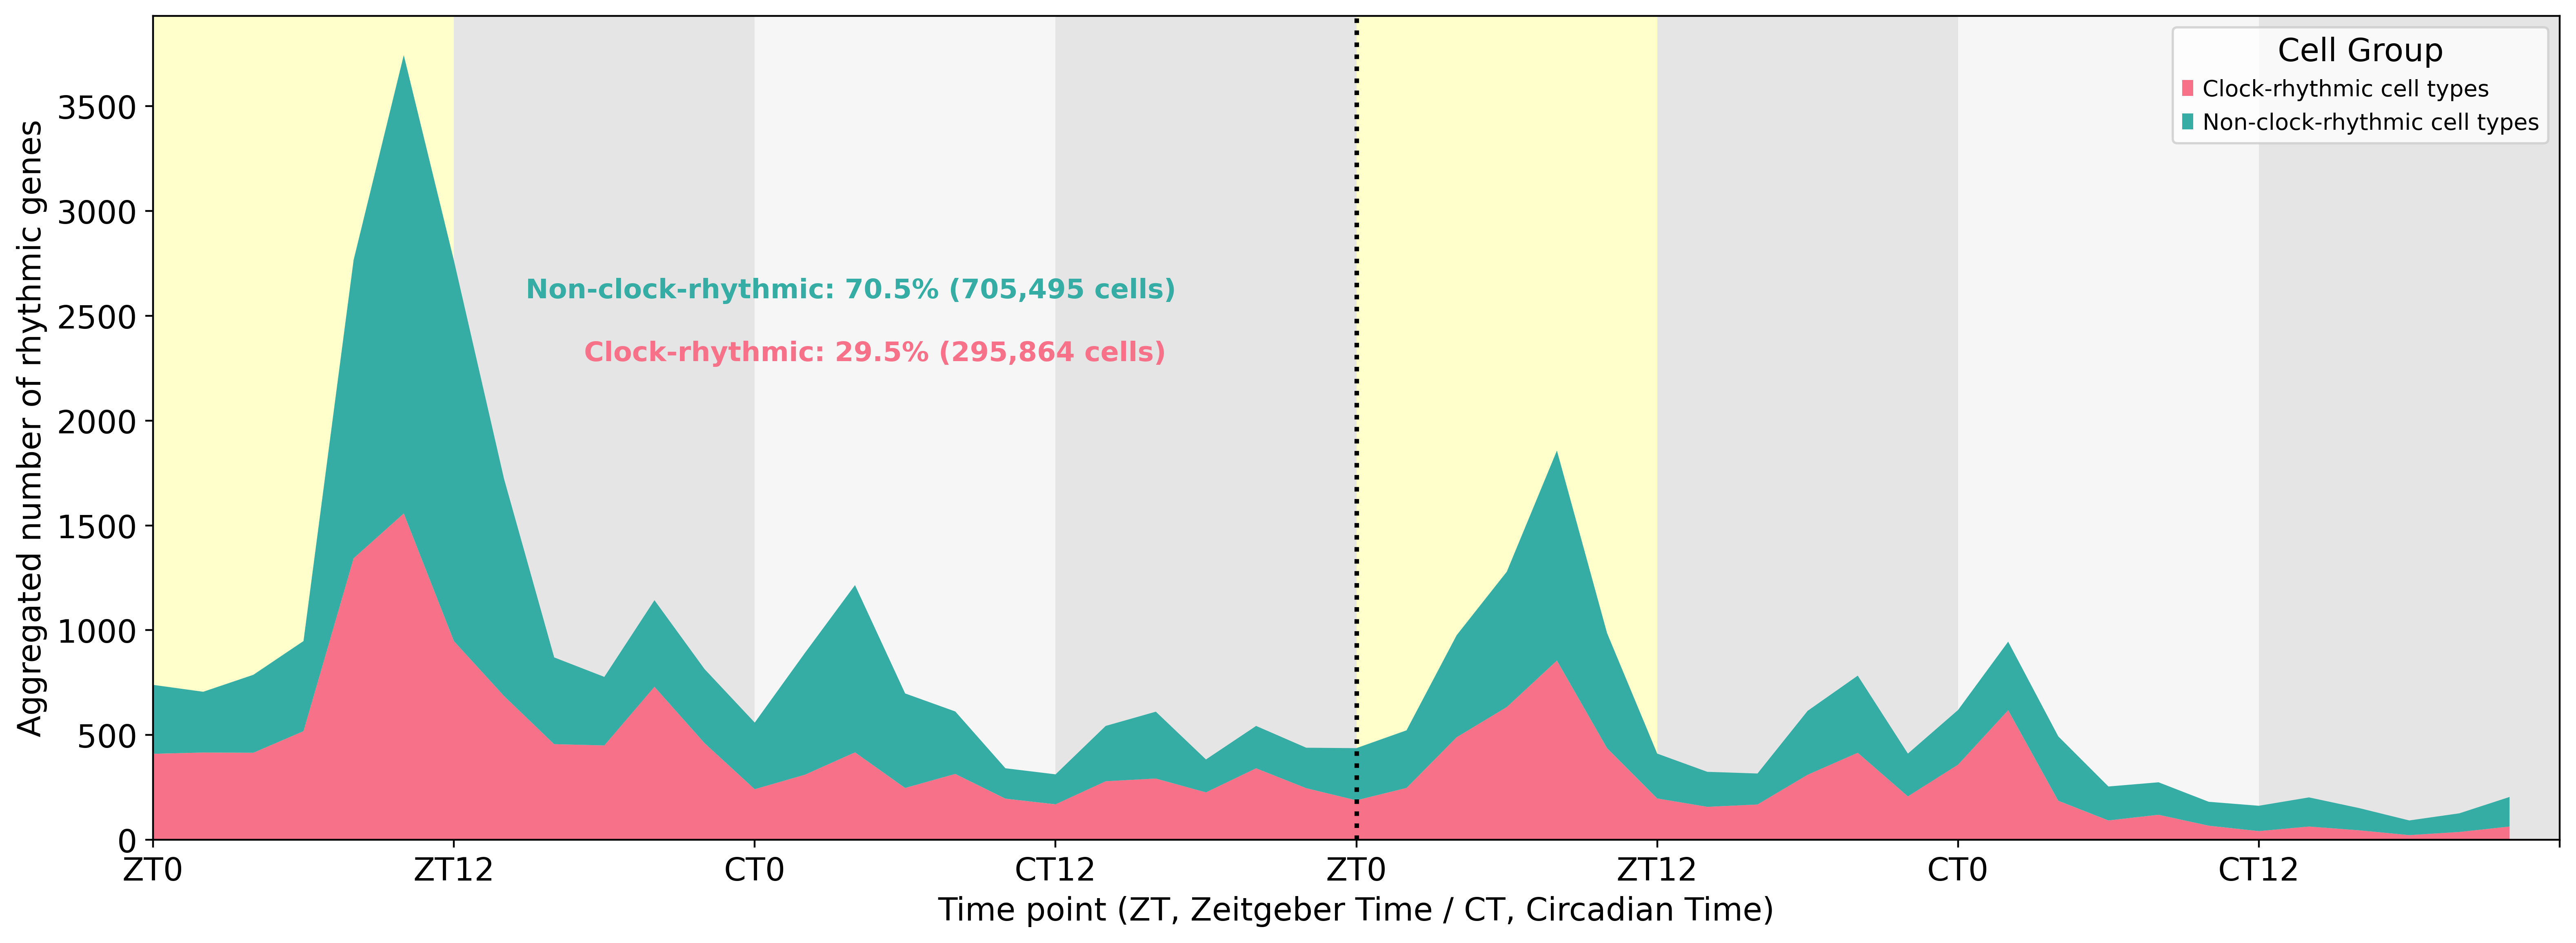

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Inputs ---
total_cells = 1_001_359
n_rhythmic = 295_864
n_non_rhythmic = 705_495

# Define rhythmic and non-rhythmic cell types
rhythmic_cell_types = [
    "FAT-1", "FAT-2", "HE", "ALG", "CHG", "PNG", "SPG", 
    "CG", "EG", "LEMG", "CONE-1", "CONE-2", "R1-6", "R7", "R8", "CLKN", "KCy", 
    "PGM", "DRA", "OCR", "T1", "EPI"
]
non_rhythmic_cell_types = [col for col in counts_pivot.columns if col not in rhythmic_cell_types]

# Group the counts
counts_grouped = pd.DataFrame({
    "Clock-rhythmic cell types": counts_pivot[rhythmic_cell_types].sum(axis=1),
    "Non-clock-rhythmic cell types": counts_pivot[non_rhythmic_cell_types].sum(axis=1)
})

# --- Plot ---
colors = sns.color_palette("husl", n_colors=2)
plt.figure(figsize=(16, 6))

# Background shading
plt.axvspan(0, 12, facecolor="yellow", alpha=0.2)
plt.axvspan(48, 60, facecolor="yellow", alpha=0.2)
plt.axvspan(24, 36, facecolor="lightgray", alpha=0.2)
plt.axvspan(72, 84, facecolor="lightgray", alpha=0.2)
plt.axvspan(12, 24, facecolor="gray", alpha=0.2)
plt.axvspan(36, 48, facecolor="gray", alpha=0.2)
plt.axvspan(60, 72, facecolor="gray", alpha=0.2)
plt.axvspan(84, 96, facecolor="gray", alpha=0.2)
plt.axvline(x=48, color="black", linestyle=":", linewidth=2)

# Plot stack
x = counts_grouped.index
y1 = counts_grouped["Clock-rhythmic cell types"]
y2 = counts_grouped["Non-clock-rhythmic cell types"]
plt.stackplot(x, y1, y2, labels=counts_grouped.columns, colors=colors)

# Add percent labels on top
midpoint = x[len(x) // 2]
max_height = y1.values.max() + y2.values.max()

# Determine y-position for the text as a fraction of the y-limit
ymax = (y1 + y2).max()
y_text_pos = ymax * 0.95  # move closer to the middle

# x-position near the center of the timeline (can fine-tune)
x_text_pos = 48  # or midpoint = x[len(x) // 2]

plt.text(midpoint * 0.6, max_height * 0.62, 
         f"Clock-rhythmic: {n_rhythmic/total_cells:.1%} ({n_rhythmic:,} cells)", 
         ha="center", va="center", fontsize=12, color=colors[0], weight='bold')

plt.text(midpoint * 0.58, max_height * 0.7, 
         f"Non-clock-rhythmic: {n_non_rhythmic/total_cells:.1%} ({n_non_rhythmic:,} cells)", 
         ha="center", va="center", fontsize=12, color=colors[1], weight='bold')

# Axes
plt.xlabel("Time point (ZT, Zeitgeber Time / CT, Circadian Time)")
plt.ylabel("Aggregated number of rhythmic genes")
plt.xticks(
    [0, 12, 24, 36, 48, 60, 72, 84, 96],
    ["ZT0", "ZT12", "CT0", "CT12", "ZT0", "ZT12", "CT0", "CT12", ""]
)
plt.legend(loc="upper right", fontsize=10, title="Cell Group")
plt.xlim(0, 96)
plt.tight_layout()
plt.grid(False)
plt.show()


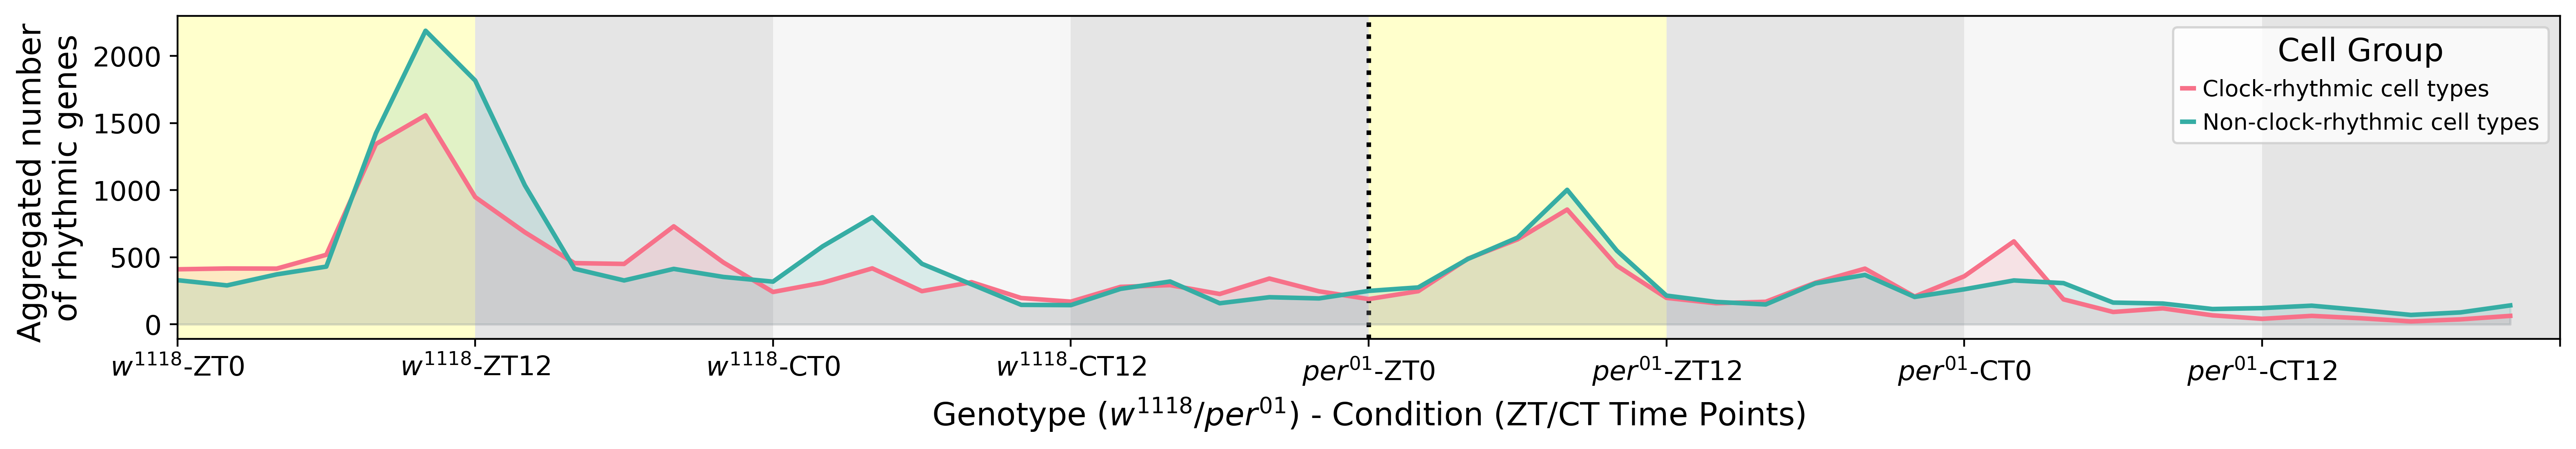

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# two colors, one per line
colors = sns.color_palette("husl", n_colors=2)

plt.figure(figsize=(16,3))

# — 1. background shading exactly as before —
for start, end, color, alpha in [
    (0, 12,   "yellow",    0.2),
    (12, 24,  "gray",      0.2),
    (24, 36,  "lightgray", 0.2),
    (36, 48,  "gray",      0.2),
    (48, 60,  "yellow",    0.2),
    (60, 72,  "gray",      0.2),
    (72, 84,  "lightgray", 0.2),
    (84, 96,  "gray",      0.2),
]:
    plt.axvspan(start, end, facecolor=color, alpha=alpha, zorder=0)
plt.axvline(48, color="black", linestyle=":", linewidth=2, zorder=1)

# — 2. plot raw counts as two lines + light fill —
x = counts_grouped.index
for idx, col in enumerate(counts_grouped.columns):
    y = counts_grouped[col].values
    plt.plot(x, y,
             label=col,
             color=colors[idx],
             linewidth=2,
             zorder=2)
    plt.fill_between(x, y,
                     color=colors[idx],
                     alpha=0.15,
                     zorder=1)

# — 3. annotate your overall percentages if you like —
#plt.text(10, counts_grouped.values.max()*0.85,f"Clock-rhythmic: {n_rhythmic/total_cells:.1%} ({n_rhythmic:,})",color=colors[0], fontsize=12, weight="bold")
#plt.text(10, counts_grouped.values.max()*0.75,f"Non-clock-rhythmic: {n_non_rhythmic/total_cells:.1%} ({n_non_rhythmic:,})",color=colors[1], fontsize=12, weight="bold")

# — 4. finish styling —
plt.xlabel(r"Genotype ($w^{1118}$/$per^{01}$) - Condition (ZT/CT Time Points)")
plt.ylabel("Aggregated number \nof rhythmic genes")
plt.yticks(fontsize = 12)
plt.xticks(
    [0, 12, 24, 36, 48, 60, 72, 84, 96],
    [r"$w^{1118}$-ZT0", r"$w^{1118}$-ZT12", r"$w^{1118}$-CT0", r"$w^{1118}$-CT12", 
     r"$per^{01}$-ZT0", r"$per^{01}$-ZT12", r"$per^{01}$-CT0", r"$per^{01}$-CT12", ""], fontsize = 12)
plt.legend(loc="upper right", fontsize=10, title="Cell Group")
plt.xlim(0, 96)
plt.grid(False)
plt.tight_layout()
plt.show()


In [35]:
major_groups = {
    "CONE": ["CONE-1","CONE-2"],
    "Glia": ["ALG","CG","CHG","EG","OCHG","PNG","SPG"],
    "C": ["C2","C3"],
    "LC": ["LC10a","LC10b","LC10d","LC11","LC12","LC14","LC17","LC20","LC22-LPLC4"],
    "FAT-1": ["FAT-1"],
    "FAT-2": ["FAT-2"],
    "KC": ["KCab","KCapbp","KCy"],
    "L": ["Lai","L1","L2","L3","L4","L5"],
    "LAWF": ["LAWF1","LAWF2"],
    "R": ["R7","R8","R1-6","DRA","OCR"],
    "LPLC": ["LPLC1","LPLC2"],
    "Mi": ["Mi1","Mi15","Mi4","Mi9"],
    "Pm": ["Pm2","Pm3","Pm4"],
    "T": ["T1","T2","T2a","T3","T4T5","T4T5ab","T4T5cd"],
    "Tm": ["Tm1","Tm2","Tm20","Tm4","Tm5a","Tm5c","Tm9","TmY14","TmY3","TmY4","TmY5a","TmY8"],
    "Dm": ["Dm1","Dm2","Dm3","Dm4","Dm8","Dm9","Dm10","Dm11","Dm12"],
    "CLKN": ["CLKN"],
    "ALPN": ["AL-PN"],
    "MAN": ["PAM-DAN", "OAN", "DAN"],
    "PGM": ["PGM"],
    "EPI": ["EPI"],
    "Unannotated": ["Unannotated"]    
}

# Flatten to a reverse-lookup dictionary
celltype_to_group = {ct: group for group, lst in major_groups.items() for ct in lst}


#bin by 2 hours
df_sig["time_bin"] = (df_sig["time"] // 2) * 2

#bin by 1 hour
#df_sig["time_bin"] = df_sig["time"].astype(int)

#bin by 0.5 hour
#df_sig["time_bin"] = (df_sig["time"] // 0.5) * 0.5
#df_sig["time_bin"] = df_sig["time_bin"].round(1)  # ensure clean decimals like 23.5, not 23.499999

#bin by 0.25 hour
#df_sig["time_bin"] = (df_sig["time"] // 0.25) * 0.25
#df_sig["time_bin"] = df_sig["time_bin"].round(1)  # ensure clean decimals like 23.5, not 23.499999



# Apply the mapping to the filtered df
df_sig["cell_group"] = df_sig["cell_type"].map(celltype_to_group).fillna("Other")


group_counts = (
    df_sig
    .groupby(["time_bin", "cell_group"])["CycID"]
    .count()
    .reset_index(name="n")
)

# Pivot so each cell_group is a column
group_pivot = group_counts.pivot(
    index="time_bin",
    columns="cell_group",
    values="n"
).fillna(0)


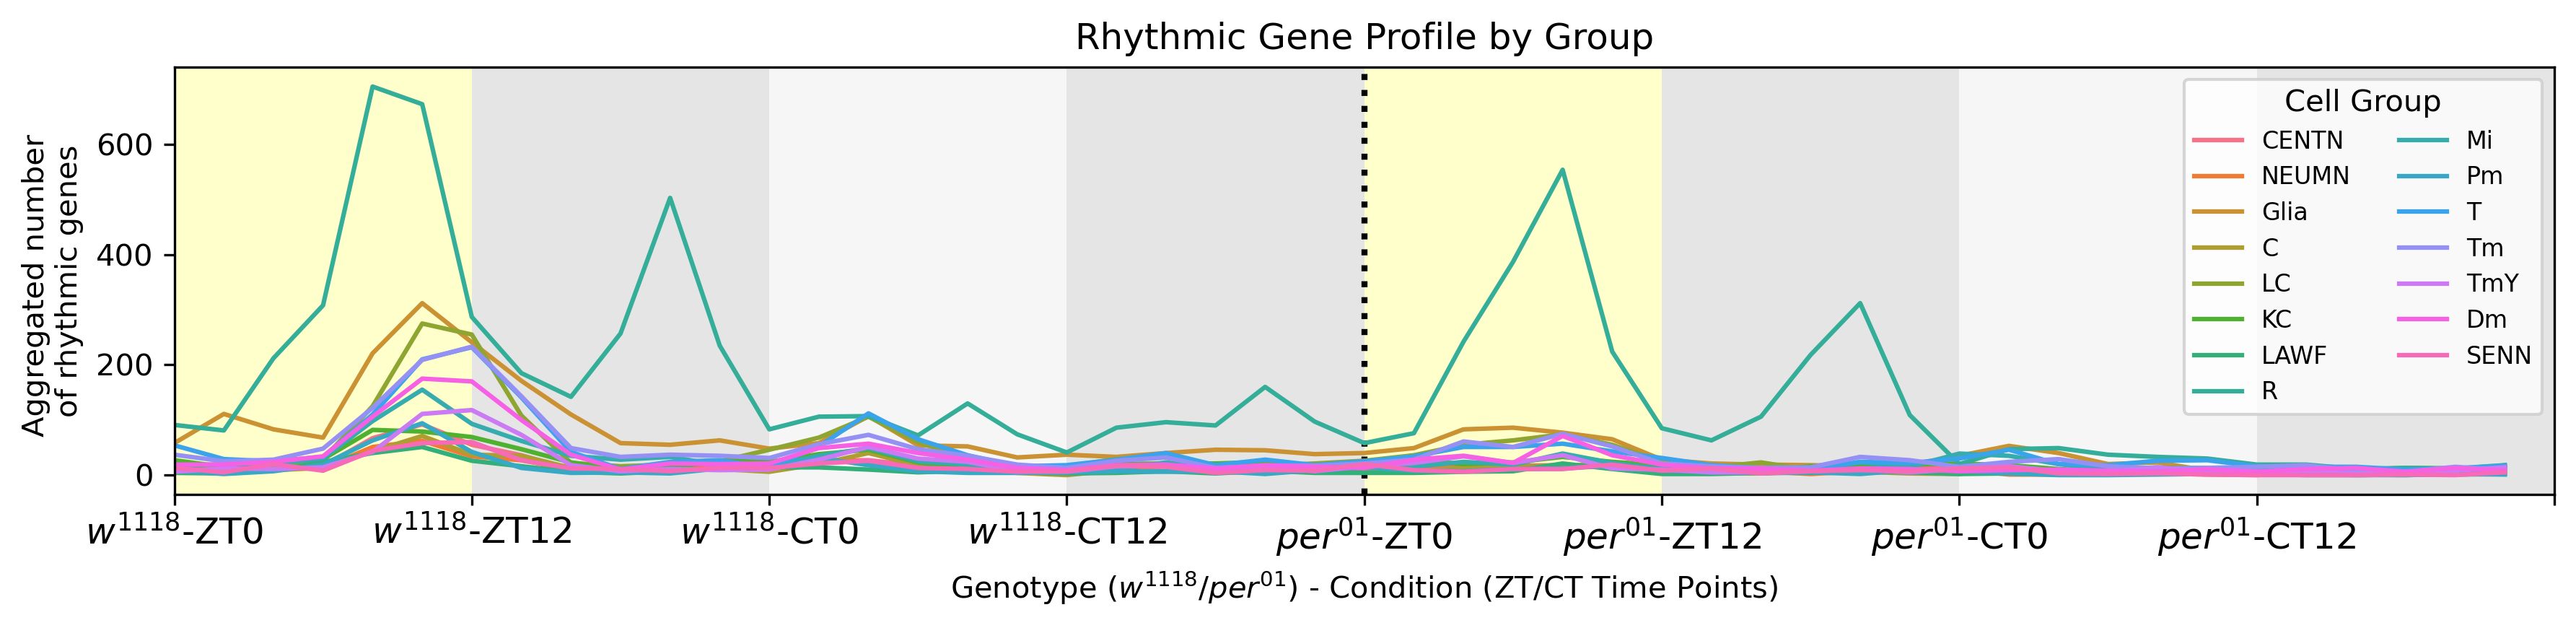

In [29]:
target_groups = ["CENTN", "NEUMN", "Glia", "C", "LC", #"PER",
                 "KC", "LAWF", "R", "Mi", "Pm", "T", "Tm", "TmY", "Dm", "SENN"]

# Prepare data and normalize per group
group_data = group_pivot[target_groups].copy()
#group_data = group_data.divide(group_data.max())  # Normalize to max per group

colors = sns.color_palette("husl", n_colors=len(target_groups))

plt.figure(figsize=(12, 3), dpi = 300)

# Background Zeitgeber / Circadian time spans
for start, end, color, alpha in [
    (0, 12, "yellow", 0.2),
    (48, 60, "yellow", 0.2),
    (24, 36, "lightgray", 0.2),
    (72, 84, "lightgray", 0.2),
    (12, 24, "gray", 0.2),
    (36, 48, "gray", 0.2),
    (60, 72, "gray", 0.2),
    (84, 96, "gray", 0.2),
]:
    plt.axvspan(start, end, facecolor=color, alpha=alpha)
plt.axvline(x=48, color="black", linestyle=":", linewidth=2)

# Plot each group (scaled)
x = group_data.index
for i, group in enumerate(target_groups):
    y = group_data[group].values
    #plt.fill_between(x, y, alpha=0.1, color=colors[i])
    plt.plot(x, y, label=group, linewidth=1.5, color=colors[i])

# Axis labels and title
plt.xlabel(r"Genotype ($w^{1118}$/$per^{01}$) - Condition (ZT/CT Time Points)")
plt.ylabel("Aggregated number \nof rhythmic genes")
plt.title("Rhythmic Gene Profile by Group")

# X-axis ticks
plt.xticks(
    [0, 12, 24, 36, 48, 60, 72, 84, 96],
    [r"$w^{1118}$-ZT0", r"$w^{1118}$-ZT12", r"$w^{1118}$-CT0", r"$w^{1118}$-CT12", 
     r"$per^{01}$-ZT0", r"$per^{01}$-ZT12", r"$per^{01}$-CT0", r"$per^{01}$-CT12", ""], fontsize = 12)

# Legend and layout
plt.legend(title="Cell Group", loc="upper right", fontsize=8, ncol = 2)
plt.grid(False)
plt.xlim(0, 96)
plt.tight_layout()
plt.show()


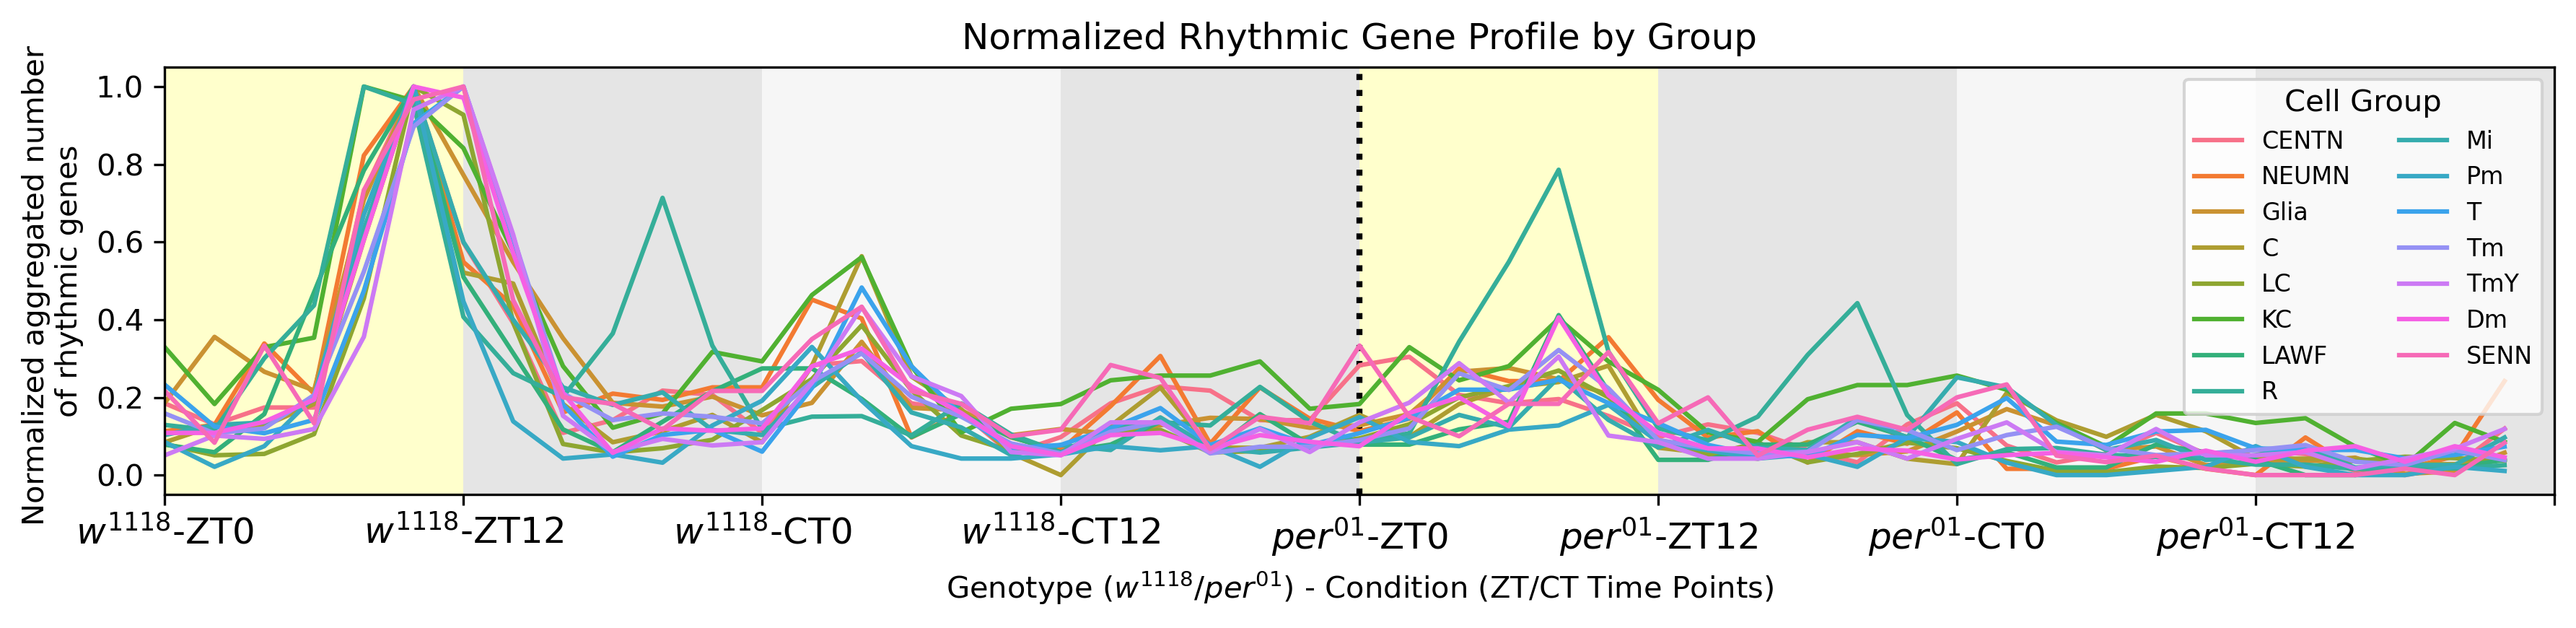

In [35]:
WTLD = pd.read_csv("WTLD_combined.csv")
WTDD = pd.read_csv("WTDD_combined.csv")
MTLD = pd.read_csv("MTLD_combined.csv")
MTDD = pd.read_csv("MTDD_combined.csv")

import pandas as pd

# Tag each DataFrame with a 'dataset' column
WTLD["dataset"] = "WTLD"
WTDD["dataset"] = "WTDD"
MTLD["dataset"] = "MTLD"
MTDD["dataset"] = "MTDD"

# Concatenate them all into one
df_combined = pd.concat([WTLD, WTDD, MTLD, MTDD], ignore_index=True)

def dataset_offset(ds):
    return {"WTLD": 0, "WTDD": 24, "MTLD": 48, "MTDD": 72}[ds]

df_combined["time"] = df_combined["avg_phase"] + df_combined["dataset"].apply(dataset_offset)

# filter significant
df_sig = df_combined[df_combined["avg_p"] < 0.05].copy()

import matplotlib.pyplot as plt
import seaborn as sns


major_groups = {
    "CONE": ["CONE-1","CONE-2"],
    "Glia": ["ALG","CG","CHG","EG","OCHG","PNG","SPG","PGM"],
    "C": ["C2","C3"],
    "LC": ["LC10a","LC10b","LC10d","LC11","LC12","LC14","LC17","LC20","LC22-LPLC4"],
    "FAT-1": ["FAT-1"],
    "FAT-2": ["FAT-2"],
    "FAT": ["FAT-1", "FAT-2"],
    "KC": ["KCab","KCapbp","KCy"],
    #"KCy": ["KCy"],
    "L": ["Lai","L1","L2","L3","L4","L5"],
    "LAWF": ["LAWF1","LAWF2"],
    "R": ["R7","R8","R1-6","DRA","OCR"],
    "LPLC": ["LPLC1","LPLC2"],
    "Mi": ["Mi1","Mi15","Mi4","Mi9"],
    "Pm": ["Pm2","Pm3","Pm4"],
    "T": ["T1","T2","T2a","T3","T4T5","T4T5ab","T4T5cd"],
    "Tm": ["Tm1","Tm2","Tm20","Tm4","Tm5a","Tm5c","Tm9","TmY14","TmY3","TmY4","TmY5a","TmY8"],
    "Dm": ["Dm1","Dm2","Dm3","Dm4","Dm8","Dm9","Dm10","Dm11","Dm12"],
    #"CLKN": ["CLKN"],
    "ALPN": ["AL-PN"],
    "MAN": ["PAM-DAN", "OAN", "DAN"],
    "PGM": ["PGM"],
    "EPI": ["EPI"],
    "Unannotated": ["Unannotated"],
    "EPI, CONE, HE":["EPI", "CONE-1", "CONE-2", "HE"],
    "CLKN, KCy, T1":["CLKN", "KCy", "T1"],
    #"T1": ["T1"],
    "PER": ["FAT-1","FAT-2","EPI","MUS","HE","CONE-1","CONE-2"],
}


major_groups = {
    "CENTN": ["CLKN","PB","dFB","EB-RN"],
    "NEUMN": ["DAN", "PAM-DAN", "SERN", "OAN", "TYRN"],
    "Glia":  ["LEMG","ALG","CG","CHG","EG","OCHG","PNG","SPG"],
    "C":     ["C2","C3"],
    "LC":    ["LC4","LC6","LC10a","LC10b","LC10d","LC11","LC12","LC13","LC14","LC16","LC17","LC18",
              "LC20","LC21","LC22-LPLC4","LLPC1","LPC1","LPLC1","LPLC2"],
    #"PER":   ["FAT-1","FAT-2","EPI","MUS","PGM","HE","CONE-1","CONE-2"],
    "KC":    ["KCab","KCapbp","KCy"],
    "L":     ["Lai","L1","L2","L3","L4","L5"],
    "LAWF":  ["LAWF1","LAWF2"],
    "R":     ["R7","R8","R1-6","DRA","OCR"],
    "Mi":    ["Mi1","Mi15","Mi4","Mi9"],
    "Pm":    ["Pm1","Pm2","Pm3","Pm4"],
    "T":     ["T1","T2","T2a","T3","T4T5","T4T5ab","T4T5cd"],
    "Tm":    ["Tm1","Tm2","Tm20","Tm4","Tm5a","Tm5c","Tm9","Tm29"],
    "TmY":   ["TmY14","TmY3","TmY4","TmY5a","TmY8"],
    "Dm":    ["Dm1","Dm2","Dm3","Dm4","Dm8","Dm9","Dm10","Dm11","Dm12"],
    "SENN":  ["AL-PN","ORN","JON","AudSN"],  # sensory neurons
}


# Flatten to a reverse-lookup dictionary
celltype_to_group = {ct: group for group, lst in major_groups.items() for ct in lst}

# Flatten to a reverse-lookup dictionary
celltype_to_group = {ct: group for group, lst in major_groups.items() for ct in lst}


#bin by 2 hours
df_sig["time_bin"] = (df_sig["time"] // 2) * 2

#bin by 1 hour
#df_sig["time_bin"] = df_sig["time"].astype(int)

#bin by 0.5 hour
#df_sig["time_bin"] = (df_sig["time"] // 0.5) * 0.5
#df_sig["time_bin"] = df_sig["time_bin"].round(1)  # ensure clean decimals like 23.5, not 23.499999

#bin by 0.25 hour
#df_sig["time_bin"] = (df_sig["time"] // 0.25) * 0.25
#df_sig["time_bin"] = df_sig["time_bin"].round(1)  # ensure clean decimals like 23.5, not 23.499999

# Apply the mapping to the filtered df
df_sig["cell_group"] = df_sig["cell_type"].map(celltype_to_group).fillna("Other")


group_counts = (
    df_sig
    .groupby(["time_bin", "cell_group"])["CycID"]
    .count()
    .reset_index(name="n")
)

# Pivot so each cell_group is a column
group_pivot = group_counts.pivot(
    index="time_bin",
    columns="cell_group",
    values="n"
).fillna(0)

# Select multiple groups to plot
target_groups = ["CENTN", "NEUMN", "Glia",
                 "C", "LC",
                 #"PER",
                 "KC",
                 "LAWF",
                 "R",
                 "Mi",
                 "Pm", "T", "Tm", "TmY", "Dm",
                 "SENN"]

# Check that all requested groups exist
missing = [g for g in target_groups if g not in group_pivot.columns]
if missing:
    raise ValueError(f"The following groups were not found in data: {missing}")

# Prepare data and normalize per group
group_data = group_pivot[target_groups].copy()
group_data = group_data.divide(group_data.max())  # Normalize to max per group

colors = sns.color_palette("husl", n_colors=len(target_groups))

plt.figure(figsize=(12, 3), dpi = 300)

# Background Zeitgeber / Circadian time spans
for start, end, color, alpha in [
    (0, 12, "yellow", 0.2),
    (48, 60, "yellow", 0.2),
    (24, 36, "lightgray", 0.2),
    (72, 84, "lightgray", 0.2),
    (12, 24, "gray", 0.2),
    (36, 48, "gray", 0.2),
    (60, 72, "gray", 0.2),
    (84, 96, "gray", 0.2),
]:
    plt.axvspan(start, end, facecolor=color, alpha=alpha)
plt.axvline(x=48, color="black", linestyle=":", linewidth=2)

# Plot each group (scaled)
x = group_data.index
for i, group in enumerate(target_groups):
    y = group_data[group].values
    #plt.fill_between(x, y, alpha=0.1, color=colors[i])
    plt.plot(x, y, label=group, linewidth=1.5, color=colors[i])

# Axis labels and title
plt.xlabel(r"Genotype ($w^{1118}$/$per^{01}$) - Condition (ZT/CT Time Points)")
plt.ylabel("Normalized aggregated number \nof rhythmic genes")
plt.title("Normalized Rhythmic Gene Profile by Group")

# X-axis ticks
plt.xticks(
    [0, 12, 24, 36, 48, 60, 72, 84, 96],
    [r"$w^{1118}$-ZT0", r"$w^{1118}$-ZT12", r"$w^{1118}$-CT0", r"$w^{1118}$-CT12", 
     r"$per^{01}$-ZT0", r"$per^{01}$-ZT12", r"$per^{01}$-CT0", r"$per^{01}$-CT12", ""], fontsize = 12)

# Legend and layout
plt.legend(title="Cell Group", loc="upper right", fontsize=8, ncol = 2)
plt.grid(False)
plt.xlim(0, 96)
plt.tight_layout()
plt.show()
